<a href="https://colab.research.google.com/github/varshini1488/DEVELOPMENT-OF-SUPERVISED-FOR-DETECTION-OF-TOXICOPHORES-USING-SIGNIFICANT-FEATURE-PREDICTION/blob/main/RANDOM_FOREST_ALGORITHM_WITH_10_SAMPLES_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rdkit-pypi


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 37.8 MB/s eta 0:00:00


In [ ]:
!pip install scikit-learn matplotlib py3Dmol

In [ ]:

!pip install rdkit py3Dmol matplotlib scikit-learn pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 52.0 MB/s eta 0:00:00


Random Forest Accuracy: 1.00
Enter compound details:
Compound Name or SMILES: Caffeine
Molecular Weight: 194.19
LogP: 0.06
Hydrogen Bond Donors: 0
Hydrogen Bond Acceptors: 5


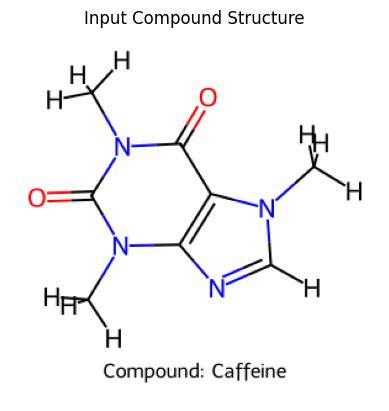

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Compound: Caffeine
Prediction: Toxic
Probability: Toxic: 1.00, Non-Toxic: 0.00


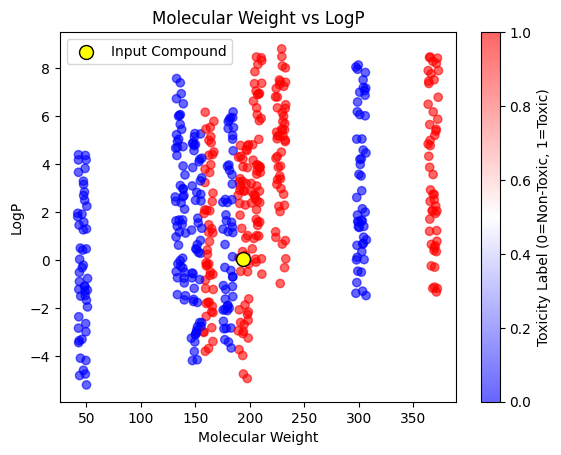

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw, AllChem
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import py3Dmol
from sklearn.model_selection import train_test_split

data = {
    'Compound_Name': ['Caffeine', 'Quercetin', 'Curcumin', 'Resveratrol', 'Limonene',
                      'Aspirin', 'Ibuprofen', 'Acetaminophen', 'Nicotine', 'Ethanol'],
    'SMILES': ['CN1C=NC2=C1C(=O)N(C(=O)N2C)C', 'C1=CC(=C(C=C1O)O)O', 'COC1=CC(=O)C(=C(C1=O)O)C',
               'C1=CC(=C(C=C1O)O)C(=O)C2=CC(=C(C=C2O)O)C', 'CC1=CCC2C1CCC(C2)C',
               'CC(=O)OC1=CC=CC=C1C(=O)O', 'CC(C)CC1=CC=C(C=C1)C(C)C(=O)O', 'CC(=O)NC1=CC=CC=C1',
               'CN1CCCC1C2=CN=CC=C2', 'CCO'],
    'Toxicity_Label': [1, 0, 1, 1, 0, 0, 1, 0, 1, 0],
    'Molecular_Weight': [194.19, 302.23, 368.38, 228.24, 136.253, 180.16, 206.28, 151.16, 162.23, 46.07],
    'LogP': [0.06, 3.51, 3.57, 3.92, 3.11, 1.19, 3.97, 0.46, 1.17, -0.31],
    'Hydrogen_Bond_Donors': [0, 5, 2, 3, 0, 1, 1, 1, 1, 1],
    'Hydrogen_Bond_Acceptors': [5, 6, 7, 6, 3, 3, 2, 2, 2, 1]
}

for i in range(490):
    index = i % 10
    new_entry = {key: data[key][index] for key in data}
    new_entry['Compound_Name'] += f"_{i+1}"
    for col in ['Molecular_Weight', 'LogP']:
        new_entry[col] += np.random.uniform(-5, 5)
    for col in ['Hydrogen_Bond_Donors', 'Hydrogen_Bond_Acceptors']:
        new_entry[col] = max(0, new_entry[col] + np.random.randint(-1, 2))
    data['Compound_Name'].append(new_entry['Compound_Name'])
    data['SMILES'].append(new_entry['SMILES'])
    data['Toxicity_Label'].append(new_entry['Toxicity_Label'])
    data['Molecular_Weight'].append(new_entry['Molecular_Weight'])
    data['LogP'].append(new_entry['LogP'])
    data['Hydrogen_Bond_Donors'].append(new_entry['Hydrogen_Bond_Donors'])
    data['Hydrogen_Bond_Acceptors'].append(new_entry['Hydrogen_Bond_Acceptors'])

df = pd.DataFrame(data)

feature_columns = ['Molecular_Weight', 'LogP', 'Hydrogen_Bond_Donors', 'Hydrogen_Bond_Acceptors']
target_column = 'Toxicity_Label'

X = df[feature_columns]
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42, n_estimators=200)
rf_model.fit(X_train, y_train)

rf_accuracy = accuracy_score(y_test, rf_model.predict(X_test))
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

def predict_toxicity(compound_input, molecular_weight, logp, h_bond_donors, h_bond_acceptors):

    if compound_input in df['Compound_Name'].values:
        row = df[df['Compound_Name'] == compound_input].iloc[0]
        smiles = row['SMILES']
        compound_name = row['Compound_Name']
    elif compound_input in df['SMILES'].values:
        row = df[df['SMILES'] == compound_input].iloc[0]
        smiles = compound_input
        compound_name = row['Compound_Name']
    else:
        print("Compound not found. Please check the name or SMILES.")
        return


    mol = Chem.MolFromSmiles(smiles)
    if not mol:
        print("Invalid SMILES string.")
        return


    mol = Chem.AddHs(mol)

    AllChem.EmbedMolecule(mol)


    img = Draw.MolToImage(mol, legend=f"Compound: {compound_name}")
    plt.imshow(img)
    plt.axis('off')
    plt.title("Input Compound Structure")
    plt.show()


    mol_block = Chem.MolToMolBlock(mol)
    view = py3Dmol.view()
    view.addModel(mol_block, "mol")
    view.setStyle({"stick": {}})
    view.zoomTo()
    view.show()


    features = pd.DataFrame([[molecular_weight, logp, h_bond_donors, h_bond_acceptors]],
                             columns=feature_columns)


    prediction = rf_model.predict(features)[0]
    probability = rf_model.predict_proba(features)[0]


    toxicity_label = "Toxic" if prediction == 1 else "Non-Toxic"
    print(f"Compound: {compound_name}")
    print(f"Prediction: {toxicity_label}")
    print(f"Probability: Toxic: {probability[1]:.2f}, Non-Toxic: {probability[0]:.2f}")


    plt.scatter(df['Molecular_Weight'], df['LogP'], c=df['Toxicity_Label'], cmap='bwr', alpha=0.6)
    plt.colorbar(label='Toxicity Label (0=Non-Toxic, 1=Toxic)')
    plt.scatter(molecular_weight, logp, color='yellow', edgecolor='black', s=100, label='Input Compound')
    plt.xlabel('Molecular Weight')
    plt.ylabel('LogP')
    plt.legend()
    plt.title('Molecular Weight vs LogP')
    plt.show()


print("Enter compound details:")
compound_input = input("Compound Name or SMILES: ")
compound_weight = float(input("Molecular Weight: "))
compound_logp = float(input("LogP: "))
compound_hbd = int(input("Hydrogen Bond Donors: "))
compound_hba = int(input("Hydrogen Bond Acceptors: "))


predict_toxicity(compound_input, compound_weight, compound_logp, compound_hbd, compound_hba)
